In [14]:
#imports
import numpy as np
import math
import matplotlib.pyplot as plt

In [15]:
#this function updates the current distance travelled and time elapsed by the moving robot
def distance_update(d_current, t_current):
    d_total = d_current + d
    t_total = t_current + t_interval
    return (d_total, t_total) #returns the total travelled distance and the total elapsed time

In [16]:
#this function updates the x and y position of the robot each time step based on the
#distance travelled per time step, and the initial angle
def update_pos(x,y):
    delta_x = (d * (math.cos(math.radians(theta_init))))
    delta_y = (d * (math.sin(math.radians(theta_init))))
    #print("delta_x: ", delta_x)
    return (x + delta_x, y + delta_y)

In [69]:
def create_noise(pos, error):
    noise = []
    for itr in pos:
        noise.append((itr[0] + np.random.normal(0, error), itr[1] + np.random.normal(0, error)))
    return noise

In [17]:
#"time interval" between "measurements"
t_interval = 0.1

In [18]:
#initial position
x_init = 0 #robot starts at origin
y_init = 0

#initialize the robot position
x = x_init
y = y_init

#initial angle
theta_init = 0

In [19]:
#robot characteristics
#robot wheelbase (metres between wheels)
wheelbase = 0.25

#ticks per meter
tpm = 1000

#robot velocity (m/s)
v = 0.5

#distance travelled per time interval =  v (m/s) * t_interval (s) = (m)
d = v * t_interval

In [20]:
#list for positions
pos = []

In [21]:
#reset time
t = 0

In [22]:
#kalman characteristics

H_k = ([1, 0], [0, 1])
print(H_k)

([1, 0], [0, 1])


In [23]:
#distance to travel (m)
d_goal = 5
d_trav = 0
#reset time
t = 0
#reset pos
x = x_init
y = y_init
pos = []

In [24]:
#print(d_trav, t, x, y)
pos.append((x,y)) #append the starting position
while d_trav < d_goal:
    d_trav, t = distance_update(d_trav, t)
    x,y = update_pos(x, y)
    pos.append((x,y))
    #print("d_trav: ", d_trav)
    #print("x, y: ", x, y)
    #print(d_trav, t, x, y)

In [25]:
#print(pos)

In [26]:
L_pos = []
itr = 0
while itr < len(pos):
    x_wheel_pos = (pos[itr][0] - (wheelbase/2)*math.cos(math.radians(90-theta_init)))
    y_wheel_pos = (pos[itr][1] + (wheelbase/2)*math.sin(math.radians(90-theta_init)))
    L_pos.append((x_wheel_pos,y_wheel_pos))
    itr+=1

In [27]:
R_pos = []
itr = 0
while itr < len(pos):
    x_wheel_pos = (pos[itr][0] + (wheelbase/2)*math.cos(math.radians(90-theta_init)))
    y_wheel_pos = (pos[itr][1] - (wheelbase/2)*math.sin(math.radians(90-theta_init)))
    R_pos.append((x_wheel_pos,y_wheel_pos))
    itr+=1

In [28]:
#print(L_pos)

In [29]:
#print(pos)

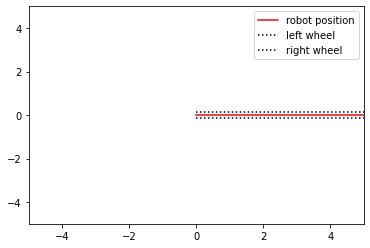

<Figure size 432x288 with 0 Axes>

In [85]:
plt.figure()
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.plot(*zip(*pos), label = 'robot position', color = 'r')
x_L,y_L = zip(*L_pos)
plt.plot(x_L,y_L, label = 'left wheel', color = 'k', linestyle = 'dotted')
x_R,y_R = zip(*R_pos)
plt.plot(x_R,y_R, label = 'right wheel', color = 'k', linestyle = 'dotted')
plt.legend()
plt.show()
plt.clf()

[(-0.06531753120434043, 0.010702950899567331), (0.06979977178558938, -0.00988801476956326), (0.04174395377636944, 0.020844888006673605), (0.1284713301491517, 0.0014885175830929571), (0.17202572553922862, -0.006517917140483483), (0.2645514173338585, -0.011851907100063348), (0.4092911610997244, -0.002181655013284643), (0.29399368290262573, 0.0038109614166164036), (0.4083919467180132, -0.01397493498811956), (0.5182509594945158, 0.050142790029559264), (0.519632029672874, 0.07658801933096238), (0.6065165971844857, -0.01720134861850711), (0.6165949756925015, 0.039367284799260896), (0.6605116527264394, 0.011930419364959921), (0.65680266697549, 0.04226501395126463), (0.7100213174116139, 0.046928343399264855), (0.8383389993553116, -0.016925500760654504), (0.9048316826529307, 0.013368238804383162), (0.8804612738598915, -0.006357311805935469), (0.9936445528226795, -0.11923799442332012), (1.052044789320697, -0.022884724975108336), (1.1245139480846282, 0.06387069807639588), (1.042055550995765, 0.01

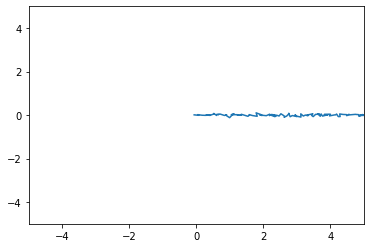

<Figure size 432x288 with 0 Axes>

In [87]:
plt.figure()
plt.xlim(-5,5)
plt.ylim(-5,5)
noisy = create_noise(pos, 0.05)
print(noisy)
x,y = zip(*noisy)
plt.plot(x,y)
plt.show()
plt.clf()